# Code to create figure 8
### Variance explained in the system from each EOF

Used in the manuscript,  
Evaporative Moisture Sources of Colorado’s Front Range: A Case Study of the Exceptionally Wet May-July Season of 2023

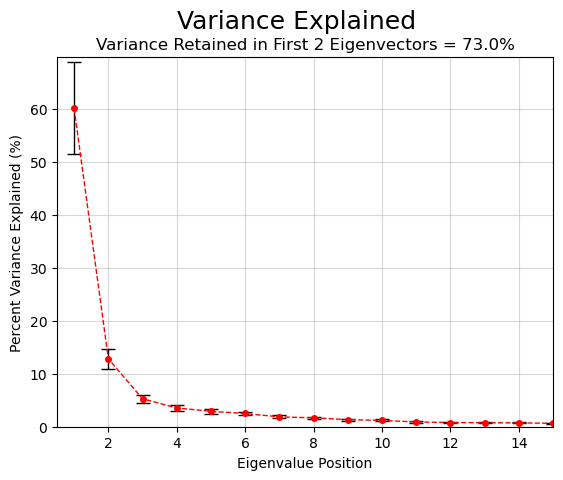

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import cmocean as cmocean
import os

#User can change--------------------------------------
date = '04_17' #date the scripts were produced MM_DD
sink_region = 'nfr' #nfr, ne, se, sp, pp
eof_num = 2 #how many EOFs to retain, maximum = #gridcells
save_plots = True
#Directories to save and data folders
SAVE_DIRECTORY = f'/Users/kathum/Research/COPEX/figures/2000-2023_{sink_region}/'+ datetime.today().strftime('%m_%d_%Y') +'/from_cashew/'
DATA_DIRECTORY = f'/Users/kathum/Research/COPEX/eof_analysis_data/from_cashew/{sink_region}/'
#-----------------------------------------------------

if save_plots == True: #create new directory to save figure if not made already
    if not os.path.exists(SAVE_DIRECTORY):
        os.makedirs(SAVE_DIRECTORY)
        print('created new directory at: ', SAVE_DIRECTORY)
    
#read in ouput from EOF analysis
variable_dtype = {'pve':np.float32, 'X':np.float32}
pve = np.loadtxt(f'{DATA_DIRECTORY}pve_{date}.csv', delimiter=',', dtype=variable_dtype['pve']) #note pve is sorted from least to greatest
X = np.loadtxt(f'{DATA_DIRECTORY}X_{date}.csv', delimiter=',', dtype=variable_dtype['X'])

# here we will assume that May-Julys are independent
# such that Nstar (number of independent features) = N (total umber of features)
Nstar = np.size(X,axis = 0)

#error bars
eb = pve*np.sqrt(2./Nstar)

#plotting-----
plt.errorbar(np.arange(1,np.size(pve)+1.),pve,yerr = np.abs(eb/2), 
             xerr = None, linewidth = 1, color = 'red', ecolor='black',
             fmt='o--', capsize=5, markersize = 4)

plt.suptitle(f'Variance Explained',fontsize=18)
plt.title(f'Variance Retained in First {eof_num} Eigenvectors = {str(np.round(np.sum(pve[::][eof_number])))}%',fontsize=12)
plt.xlim(0.5, np.max([15.,eof_num+1.5]))
plt.ylim(0,np.max(pve)+ np.max(np.abs(eb/2))+1)
plt.xlabel('Eigenvalue Position')
plt.ylabel('Percent Variance Explained (%)')
plt.grid(alpha = 0.5)

plt.savefig(SAVE_DIRECTORY+f'e{eof_num}_percent_variance_explained.png', dpi = 500)